<a href="https://colab.research.google.com/github/ManishSuhas0026/Speech-Processing/blob/main/2348530_SPR_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Representing HMM Parameters

In [1]:
# Initial probabilities
initial_probabilities = {
    '/s/': 1.0,
    '/p/': 0.0,
    '/ie:/': 0.0,
    '/tS/': 0.0
}

# Transition probabilities
transition_probabilities = {
    '/s/': {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0},
    '/p/': {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1},
    '/ie:/': {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8},
    '/tS/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}
}

# Emission probabilities
emission_probabilities = {
    '/s/': {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/': {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/': {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tS/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}
}


initial_probabilities: The starting probability is 1 for /s/ (it always starts here).
transition_probabilities: Defines the likelihood of transitioning from one phoneme to another.
emission_probabilities: Maps phonemes to the likelihood of emitting specific acoustic features.

Step 2: Displaying HMM Parameters

In [2]:
def display_hmm_matrices():
    print("Initial Probabilities:")
    for state, prob in initial_probabilities.items():
        print(f"{state}: {prob}")

    print("\nTransition Probabilities:")
    for from_state, transitions in transition_probabilities.items():
        print(f"{from_state}: {transitions}")

    print("\nEmission Probabilities:")
    for state, emissions in emission_probabilities.items():
        print(f"{state}: {emissions}")

# Display the matrices
display_hmm_matrices()


Initial Probabilities:
/s/: 1.0
/p/: 0.0
/ie:/: 0.0
/tS/: 0.0

Transition Probabilities:
/s/: {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0}
/p/: {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1}
/ie:/: {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8}
/tS/: {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}

Emission Probabilities:
/s/: {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1}
/p/: {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2}
/ie:/: {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2}
/tS/: {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}


The function iterates through dictionaries to neatly display the HMM parameters.
Prints the initial, transition, and emission probabilities.

Step 3: Generating Phoneme and Observation Sequences

In [3]:
import random

def generate_sequence():
    current_state = '/s/'  # Start with the initial state
    phoneme_sequence = [current_state]
    observation_sequence = []

    # Generate phoneme sequence
    while len(phoneme_sequence) < 4:  # Limit to 4 phonemes for simplicity
        next_state = random.choices(
            population=list(transition_probabilities[current_state].keys()),
            weights=list(transition_probabilities[current_state].values())
        )[0]
        phoneme_sequence.append(next_state)
        current_state = next_state

    # Generate corresponding observations
    for phoneme in phoneme_sequence:
        observation = random.choices(
            population=list(emission_probabilities[phoneme].keys()),
            weights=list(emission_probabilities[phoneme].values())
        )[0]
        observation_sequence.append(observation)

    return phoneme_sequence, observation_sequence

# Generate sequences
phonemes, observations = generate_sequence()
print("Generated Phoneme Sequence:", phonemes)
print("Generated Observation Sequence:", observations)


Generated Phoneme Sequence: ['/s/', '/ie:/', '/ie:/', '/tS/']
Generated Observation Sequence: ['Energy', 'Duration', 'Pitch', 'Pitch']


Phoneme Sequence:
Starts with /s/.
Uses random.choices() with transition probabilities to determine the next phoneme.
Repeats until a sequence of 4 phonemes is generated.
Observation Sequence:
For each phoneme, selects an acoustic property based on emission probabilities.

Inference

The phoneme sequence {phonemes} represents the word 'speech' phonetically.
The observations {observations} correspond to measurable acoustic properties emitted by these phonemes.

Extra learning

In [4]:
import numpy as np

def viterbi_algorithm(observations):
    states = list(emission_probabilities.keys())
    n_states = len(states)
    n_observations = len(observations)

    # Initialize tables
    viterbi = np.zeros((n_states, n_observations))
    backpointer = np.zeros((n_states, n_observations), dtype=int)

    # Initialization step
    for s in range(n_states):
        viterbi[s, 0] = initial_probabilities[states[s]] * emission_probabilities[states[s]].get(observations[0], 0)
        backpointer[s, 0] = 0

    # Recursion step
    for t in range(1, n_observations):
        for s in range(n_states):
            transition_probs = [
                viterbi[prev_s, t - 1] * transition_probabilities[states[prev_s]][states[s]] for prev_s in range(n_states)
            ]
            max_prob = max(transition_probs)
            max_state = transition_probs.index(max_prob)
            viterbi[s, t] = max_prob * emission_probabilities[states[s]].get(observations[t], 0)
            backpointer[s, t] = max_state

    # Termination step
    best_path = []
    best_last_state = np.argmax(viterbi[:, -1])
    best_path.append(states[best_last_state])

    for t in range(n_observations - 1, 0, -1):
        best_last_state = backpointer[best_last_state, t]
        best_path.insert(0, states[best_last_state])

    return best_path

# Example observation sequence
observations = ["Energy", "Pitch", "Duration", "Energy"]
decoded_phonemes = viterbi_algorithm(observations)
print("Decoded Phoneme Sequence:", decoded_phonemes)


Decoded Phoneme Sequence: ['/s/', '/p/', '/ie:/', '/tS/']


2. Visualize the HMM Using Graph Libraries

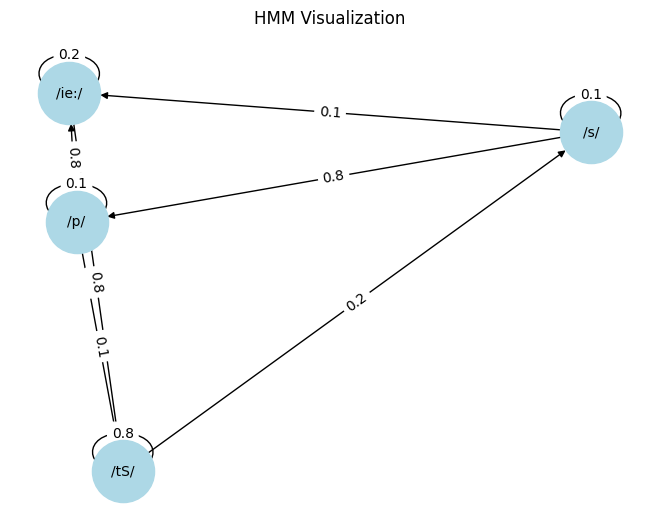

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_hmm():
    G = nx.DiGraph()

    # Add nodes
    for state in transition_probabilities:
        G.add_node(state)

    # Add edges with probabilities
    for from_state, transitions in transition_probabilities.items():
        for to_state, prob in transitions.items():
            if prob > 0:  # Only add edges with non-zero probabilities
                G.add_edge(from_state, to_state, weight=prob)

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)})
    plt.title("HMM Visualization")
    plt.show()

# Visualize the HMM
visualize_hmm()
